In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func , inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [16]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
print('Columns in station')
for column in columns:
    print(column['name'], column['type'])
columns = inspector.get_columns('measurement')
print('\nColumns in measurement')
for column in columns:
    print(column['name'], column['type'])

Columns in station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT

Columns in measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
recent_date = session.query(measurement).order_by(measurement.date.desc()).first()
print(recent_date.date)

2017-08-23


Text(0.5, 1.0, 'Hawaii Precipitation Data between 2016-08-24 and 2017-08-24')

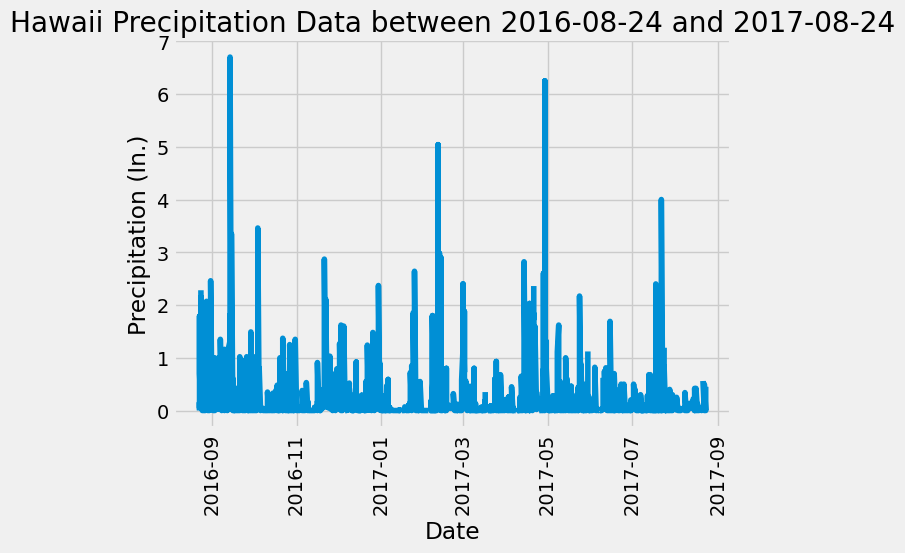

In [34]:
# Query to retrieve the last 12 months of precipitation data. 
last_12_months = session.query(measurement.date,measurement.prcp).filter(measurement.date >= '2016-08-23').order_by(measurement.date).all()

# Adding results to a dataframe,. 
precipitation_df = pd.DataFrame(last_12_months, columns=['date','prcp'])
# Ordering the results in ascending order (by date).
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])
precipitation_df.set_index('date',inplace=True)
precipitation_df.sort_values('date',ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
figure = plt.plot(precipitation_df)
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Precipitation (In.)')
plt.title('Hawaii Precipitation Data between 2016-08-24 and 2017-08-24')

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number stations in the dataset
session.query(station.station).count()

9

In [43]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activity = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).all()
max(activity,key=lambda x:x[1])

('USC00519281', 2772)

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_max = session.query(measurement.date,func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

temp_min = session.query(measurement.date,func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

temp_avg = session.query(measurement.date,func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()


print(f'The highest temperature is {temp_max}')
print(f'The lowest temperature is {temp_min}')
print(f'The average temperature is {temp_avg}')

The highest temperature is [('2015-09-10', 85.0)]
The lowest temperature is [('2013-01-16', 54.0)]
The average temperature is [('2010-01-01', 71.66378066378067)]


In [49]:
# Using the most active station id
# Querying the last 12 months of temperature observation data for this station 
most_active_last_year = session.query(measurement.date,measurement.tobs).filter(measurement.date >= '2016-08-23').filter(measurement.station == 'USC00519281').all()

temp_df = pd.DataFrame(most_active_last_year, columns=['Date','Temp (F)'])
temp_df.set_index('Date',inplace=True)
temp_df

,Temp (F)
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


Text(0.5, 1.0, 'Frequency of Temperatures in Hawaii')

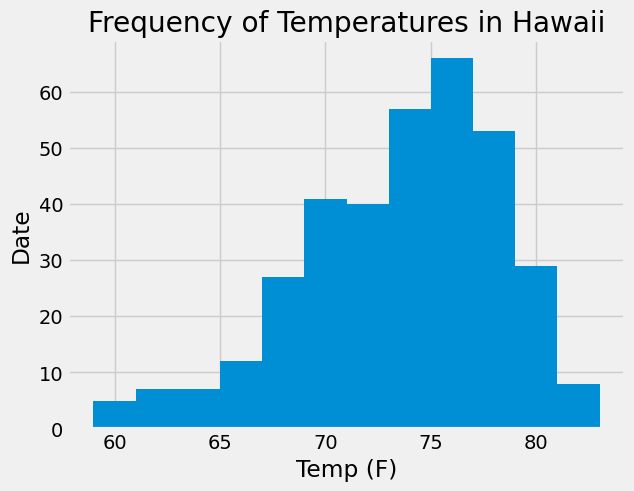

In [50]:
#plotting the results as a histogram
plt.hist(temp_df,bins=12)
plt.xlabel('Temp (F)')
plt.ylabel('Date')
plt.title('Frequency of Temperatures in Hawaii')

# Close session

In [ ]:
# Close Session
session.close()